In [3]:
## Import packages
import pandas as pd               # Used to work with tables in Python
import numpy as np                # Used to work with arrays and Pandas Series (columns)
import matplotlib.pyplot as plt   # A useful visualisation package
import seaborn as sns             # Another useful visualisation package

<i>What is each package for? And how we might be using it in the coming script for Time Series analysis?</i>

## Get the data

For this workshop your instructor will be using a dataset about the historic frequency of sunspots. You have three options for participating in this workshop, each requiring different skill levels to adapt the code:
1. Use the same sunspots dataset as your instructor (available on Aptem)
2. Use the daily temperatures dataset (available on Aptem) - this will test your skills for adapting the code to new data
3. Use you own work-related dataset - this is potentially the most difficult, but also the most rewarding.

You will have received guidance prior to the workshop on how to prepare you own data. If you have not prepared before the workshop starts then we recommended <b>not</b> choosing option 3.

In [4]:
#os.chdir(r'C:\**path_directory**')
mss = pd.read_csv('monthly-sunspots.csv')

In [5]:
## Look at the first few rows
mss.head(2)

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6


## Working with dates in Pandas

Pandas has imported the data in the month column as data type 'object'. We need to convert it into datetimes which are easier to work with, especially when conducting time series analysis. The visualisations that we create later in the code work best when the index of the DataFrame is datetime.

In [8]:
## What data type is the month column?
mss['Month'].dtype

dtype('O')

In [9]:
## We need to convert our month column data into datetimes
mss['Month'] = pd.to_datetime(mss['Month'], format='%Y-%m', errors='ignore')

## If you are using your own data then you may need to change the 'format' argument to something else
# <your column> = pd.datetime(<your column>, format='<date format>', errors='ignore')

#    %y :    2-digit year
#    %Y :    4-digit year
#    %m :    month
#    %d :    day
#    %H :    hour
#    %M :    minute
#    %S :    second

In [10]:
# Now we can use are date column as an index
# And we can create columns based on individual components

# Sort the data and convert the date column into the index for the table
mss['id'] = mss.index.astype(int)
mss = mss.sort_values('Month')
mss = mss.set_index('Month')

# Use the index to extract certain properties of the date
# Such as the year, month, weekday, etc.
mss['year'] = mss.index.year.astype(int)
mss['month'] = mss.index.month.astype(int)
mss['cycle_11yr'] = mss.index.year.astype(int) % 11

# ts['weekday_num'] = ts.index.weekday.astype(int)
# ts['day_of_year'] = ts.index.dayofyear.astype(int)

In [11]:
## Let's look at the data frame again before starting analysis
mss.head(20)

,Sunspots,id,year,month,cycle_11yr
Month,,,,,
1749-01-01,58.0,0,1749,1,0
1749-02-01,62.6,1,1749,2,0
1749-03-01,70.0,2,1749,3,0
1749-04-01,55.7,3,1749,4,0
1749-05-01,85.0,4,1749,5,0
1749-06-01,83.5,5,1749,6,0
1749-07-01,94.8,6,1749,7,0
1749-08-01,66.3,7,1749,8,0
1749-09-01,75.9,8,1749,9,0


Our data now has five columns and an index in datetime format:
1. Sunspots - this was imported right at the start and contains the times series data we are going to analyse
2. id - this is a simple ascending integer column which can be used for modelling and sorting
3. year - corresponds to the year of each datapoint
4. month - corresponds to the month of each datapoint
5. cycle_11r - indicates the position of each datapoint within an 11-year cycle (sunspots follow a roughly 11-year pattern)

## Visualise the data

Visualising time series data with Pandas is very simple, especially if we have ensured that the index corresponds to the datetime component of our time series. The x-axis is automatically assigned to the index of the DataFrame unless specified otherwise.

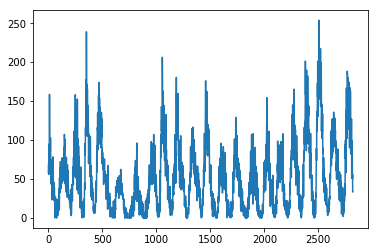

In [6]:
### Plot as a line graph
# The index for the dataframe is automatically used as the x-axis
mss['Sunspots'].plot()
plt.show()

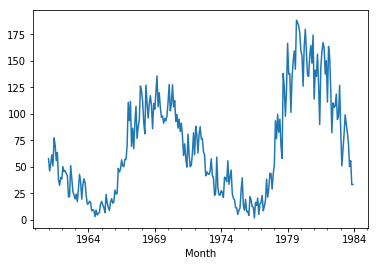

In [13]:
### Plot the data again, but filter to only the include data since 1960
mss['Sunspots'][mss['year'] > 1960].plot()
plt.show()

## The Trend component

There are two common ways to isolate and remove the trend component in time series analysis:
1. Modelling the trend with a regression model (or similar)
2. Differencing subsequent datapoints from each other

We apply both methods here one after the other and we can compare the results between the two approaches.

#### 1. Modelling the trend with a regression model (or similar)

In [14]:
## Import a package to create linear regression models
import statsmodels.api as sm

## The Y array contains the values we want to predict
Y = mss['Sunspots'].values

## The X array contains the values we use as predictors
X1 = mss['id'].values.reshape(-1, 1)
X1 = sm.add_constant(X1)

slr = sm.OLS(Y, X1).fit()  # perform linear regression
mss['trend'] = slr.predict(X1)  # make predictions

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Program Files\Anaconda3-2018.12\lib\site-packages\scipy\misc\__init__.py)

KeyError: 'trend'

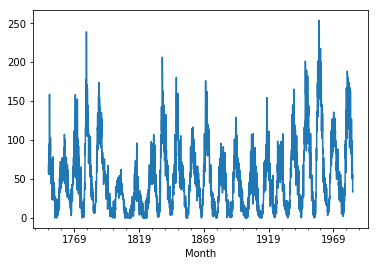

In [15]:
### Plot the sales column as a line graph
# And also add the trend column to check that our results are sensible
mss['Sunspots'].plot()
mss['trend'].plot()
plt.show()

In [16]:
### Remove the trend component
# So that we can model the othr components in the time series
mss['Sunspots_2'] = mss['Sunspots'] - mss['trend']

### Plot the data again
# It should now lie along y=0, without any overall trend
mss['Sunspots_2'].plot()
plt.show()

KeyError: 'trend'

The first method keeps the original shape of the data whilst removing the trend.

#### 2. Differencing subsequent datapoints from each other

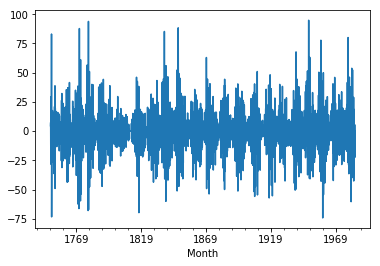

In [17]:
mss['Sunspots_diff'] = mss['Sunspots'] - mss['Sunspots'].shift(1)

### Plot the data again
# It should now lie along y=0, without any overall trend
mss['Sunspots_diff'].plot()
plt.show()

The second method is simpler but the data can be less intuitive to work with afterwards.

## The seasonal component

In this section we use box plot visualisations to explore the seasonality in the data. First we look at seasonality by month and by the position in the 11-year cycle. We see a strong pattern based on the 11-year cycle but no pattern by month.

However, there are strong non-normal patterns in the data when we look at the seasonality by 11-year cycle - many outliers for each boxplot. We may want to consider other approaches for this data later, which do not rely on assumptions of 'normality'.

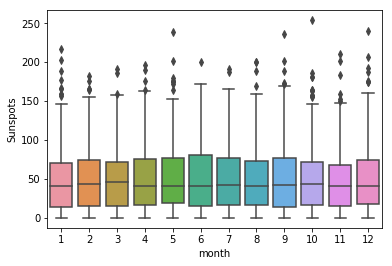

In [18]:
### Generate box-plots showing the distribution of values
###  for each month of the year
sns.boxplot(data=mss, x='month', y='Sunspots')

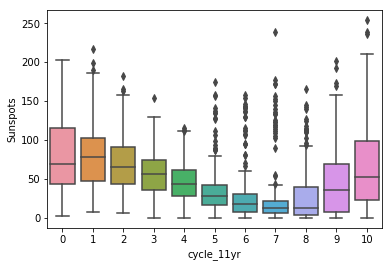

In [19]:
### Generate box-plots showing the distribution of values
###  for each yearly position in an 11-year cycle
sns.boxplot(data=mss, x='cycle_11yr', y='Sunspots')

## Using moving averages to remove noise / seasonality

We can use moving averages to remove seasonality components. We apply 12-month and 11-year moving averages in the code below. Predictably, given what we saw in the box-plots above, calculating a 12-month average does not remove any seasonality. But it does remove 'noise' and makes other patterns easier to observe.

In [ ]:
### Calculate a two types of moving average
mss['ma_12_month'] = mss['Sunspots'].rolling(window=12).mean()
mss['ma_11_year'] = mss['Sunspots'].rolling(window=132).mean()
mss.head(20)
# When we look at the top 20 rows, we see that ma_11_year is always NaN
# This is because the first 132 rows will all be blank until we have enough data to calculate a moving average.

In [ ]:
### Plot the original time series
mss['Sunspots'].plot()
plt.show()

In [ ]:
### Plot the 12-month moving average (removes noise)
mss['ma_12_month'].plot()
plt.show()

In [ ]:
### Plot the 11-year moving average (removes seasonality)
mss['ma_11_year'].plot()
plt.show()

## Putting it all together

Now that we have explored the data, we can make choices about how we want to remove the trend and seasonal components from the data. The objective is to make the time series 'stationary' where each datapoint can be modelled as a random  variable with constant mean, variance and autocorrelation.

This may complete the time series analysis. Alternatively, we can take our stationary series and start to apply advanced time series techniques such as ARIMA.

In [ ]:
## PLAN FOR MAKING THE DATA STATIONARY:
#   - Find 11 year moving average
#   - Apply differencing to remove trend

In [ ]:
mss['ma_11_year'] = mss['Sunspots'].rolling(window=132).mean()
mss['ma_11_year_diff'] = mss['Sunspots'] - mss['ma_11_year']
mss['ma_diff'] = mss['ma_11_year_diff'] - mss['ma_11_year_diff'].shift(1)

### Plot the data again
# It should now look stationary (fingers crossed)
mss['ma_diff'].plot()
plt.show()
# (it doesn't)

## Checking for normality

The Q-Q plot is a good visualisation choice to check whether our data is normal. In the case of our sunspots data, we have failed to make the time series completely stationary, which we can observe by noticing that the tails in the Q-Q plot deviate from the target line.

This is partly because sunspots follow a fractal pattern and fractals are notoriously tricky to analyse using conventional machine learning techniques, especially those which require assumptions of normality.

In [ ]:
import statsmodels.api as sm

In [ ]:
## Produce a Q-Q plot of the time series
mss['ma_diff_to_plot'] = (mss['ma_diff'] - np.mean(mss['ma_diff'])) / np.std(mss['ma_diff'])
fig = sm.qqplot(mss['ma_diff_to_plot'])
plt.plot(mss['ma_diff_to_plot'], mss['ma_diff_to_plot'], color='grey')
plt.show()

## Next steps

With this particular dataset, I might consider using alternative approaches to time series modelling. However, if we had successfully isolated a <b>normally distributed random component</b> then what would our next steps be?
 - We could reverse engineer our transformations of the data to generate predictions for next month
 - We could use linear regression to see what external factors are related to our final 'random' component
 - We could apply the ARIMA modelling techniques